# [3] Recent Daily Booking Rate

The snapshot of this database was taken on 2017-07-11 at midnight and only contains data refeclting events prior to that date. A junior analyst is investigating daily booking rate during the days prior to the snapshot and is concerned about an apparent downward trend. You are tasked with helping them out.

In [1]:
cd ..

/home/jovyan/Business_Analytics/Business-Insights-and-Analytics/Marketing_Analytics


In [2]:
%run __init__.py

In [4]:
%matplotlib inline

## 1. First, let's reproduce their results. They tell you that daily booking rate is defined to be the percentage of conversations created each day that eventually book. What is the daily booking rate for each of the 90 days prior to the snapshot? Is there a downward trend?

a) Convert `added` and `booked_at` columns to datetime format

b) Create a mask to find only the entries within 90 days prior to the snapshot

c) Use `groupby()` to count the number of conversations started on each of the days and the number of bookings on each of the days

d) Calculate booking rate per day by dividing `booked_at` by `number_conversations_started`, multiply by 100

e) Plot the results

In [5]:
conversations_conversation.head(2)

,id,start_date,end_date,units,added,booking_total,cancellation_fault,requester_id,service_id,booked_at,cancelled_at
0,208294,2017-06-06,2017-06-09,3,2017-05-25 17:06:35.796792,102,NaN,64416,81642,2017-05-26 21:02:09.499404,NaN
1,208295,2017-07-16,2017-07-25,9,2017-07-07 06:07:08.053227,324,NaN,64415,79559,NaN,NaN


In [6]:
convers_con = conversations_conversation[['added', 'booked_at']]
convers_con.head()

,added,booked_at
0,2017-05-25 17:06:35.796792,2017-05-26 21:02:09.499404
1,2017-07-07 06:07:08.053227,NaN
2,2017-05-26 17:47:38.312937,2017-05-29 01:27:14.256611
3,2017-06-10 10:13:55.357196,2017-06-15 15:00:33.124108
4,2017-05-15 10:00:03.702143,2017-05-16 00:40:10.332902


In [7]:
# convert each column to datetime format
convers_con['added'] = pd.to_datetime(convers_con['added'])
convers_con['booked_at'] = pd.to_datetime(convers_con['booked_at'])

# splitting each column into a date column
convers_con['added'] = convers_con["added"].dt.date
convers_con['booked_at'] = convers_con["booked_at"].dt.date

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documenta

In [8]:
convers_con.head()

,added,booked_at
0,2017-05-25,2017-05-26
1,2017-07-07,NaN
2,2017-05-26,2017-05-29
3,2017-06-10,2017-06-15
4,2017-05-15,2017-05-16


In [8]:
N = 90
date_end = datetime(2017,7,11)

date_N_days_ago = date_end - timedelta(days=N)
date_N_days_ago

datetime.datetime(2017, 4, 12, 0, 0)

In [9]:
date_start = datetime(2017,4,12)

In [10]:
date_end   = datetime.date(date_end)
date_start = datetime.date(date_start)

In [11]:
date_mask = (convers_con['added'] > date_start) & (convers_con['added'] <= date_end)

In [12]:
convers_in_range = convers_con[date_mask]
convers_in_range.head()

,added,booked_at
0,2017-05-25,2017-05-26
1,2017-07-07,NaN
2,2017-05-26,2017-05-29
3,2017-06-10,2017-06-15
4,2017-05-15,2017-05-16


In [13]:
convers_in_range.shape

(22495, 2)

In [14]:
convers_in_range['total_number_conversations'] = convers_in_range['added']
convers_in_range.head(2)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,added,booked_at,total_number_conversations
0,2017-05-25,2017-05-26,2017-05-25
1,2017-07-07,NaN,2017-07-07


In [15]:
number_conversations = convers_in_range.groupby('added', as_index=False).count()
number_conversations.head(2)

,added,booked_at,total_number_conversations
0,2017-04-13,103,226
1,2017-04-14,93,213


In [16]:
number_conversations['booking_rate'] = (
    number_conversations.booked_at/number_conversations.total_number_conversations) * 100

In [17]:
number_conversations.head()

,added,booked_at,total_number_conversations,booking_rate
0,2017-04-13,103,226,45.575221
1,2017-04-14,93,213,43.661972
2,2017-04-15,87,213,40.845070
3,2017-04-16,94,206,45.631068
4,2017-04-17,84,207,40.579710


In [18]:
x = number_conversations.added
y = number_conversations.booking_rate

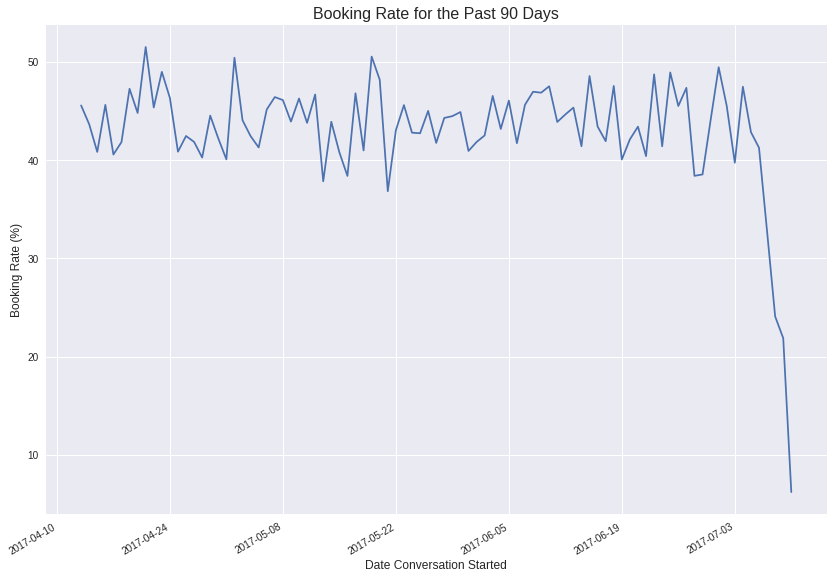

In [19]:
fig = plt.figure(figsize=(14,10))
plt.plot(x,y)
plt.gcf().autofmt_xdate()
plt.xlabel('Date Conversation Started', fontsize=12)
plt.ylabel('Booking Rate (%)', fontsize=12)
plt.title('Booking Rate for the Past 90 Days', fontsize=16)


- 3 days - Average time it takes for a conversation to turn into a booking. 

- The last few days are not booked because not enough time has passed for the booking to take place.


In [9]:
convers_con['total_number_conversations'] = convers_con['added']
convers_con.head(2)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,added,booked_at,total_number_conversations
0,2017-05-25,2017-05-26,2017-05-25
1,2017-07-07,NaN,2017-07-07


In [10]:
test_number_con = convers_con.groupby('added', as_index=False).count()
test_number_con.head(2)

,added,booked_at,total_number_conversations
0,2015-07-18,1,1
1,2015-07-19,1,2


In [11]:
test_number_con['booking_rate'] = (
    test_number_con.booked_at/test_number_con.total_number_conversations) * 100

In [12]:
x2 = test_number_con.added
y2 = test_number_con.booking_rate

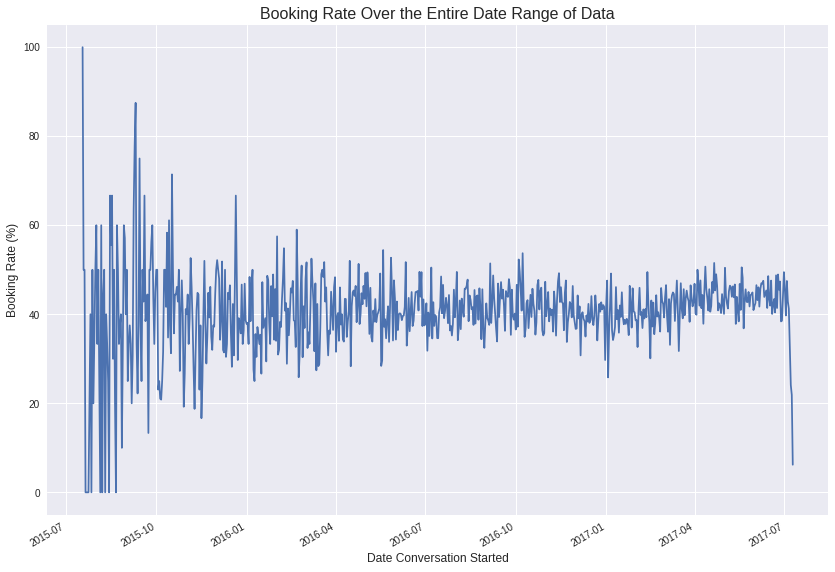

In [14]:
fig = plt.figure(figsize=(14,10))
plt.plot(x2,y2)
plt.gcf().autofmt_xdate()
plt.xlabel('Date Conversation Started', fontsize=12)
plt.ylabel('Booking Rate (%)', fontsize=12)
plt.title('Booking Rate Over the Entire Date Range of Data', fontsize=16)


- Chart shows that in the past year and a half the booking rate stabilized around 40%

- Alternatively, to explore further, look at another 90 day snapshot, does the same trend exist? Or plot cancellation rate on the same chart, is there a similar trend?



## 2. Can you narrate a reason why this trend exists? Is there a reason to be concerned?
a) Calculate the average time it takes for a conversation to turn into a booking by subtracting the date `added` from the date `booked_at` 

In [20]:
convers_con['time_difference'] = convers_con.booked_at - convers_con.added

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [21]:
convers_con.time_difference.value_counts(dropna=False)

NaT        46653
2 days      7263
3 days      6936
4 days      5436
1 days      5126
5 days      3665
6 days      2166
7 days      1128
0 days       735
8 days       451
9 days       149
10 days       30
11 days        3
12 days        2
Name: time_difference, dtype: int64

In [22]:
convers_con.time_difference.mean()

Timedelta('3 days 05:24:30.679963')

### Conversations and bookings don't happen instantaneously, it takes on average 3 days for a conversation to turn into a booking. It makes sense that the conversations started in the past 5 days haven't been booked yet because enough time hasn't passed yet for the booking to take place.

#### Other things to look in to: 
- What about looking at another 90 day snapshot, does the same trend exist?
- What about looking at a snapshot of more than 90 days, does the same trend exist, is there a more clear booking rate?
- How many of these bookings were cancelled? If we plotted cancellation rate on the same plot, would we see a similar trend?